In [471]:
%matplotlib inline

In [487]:
import matplotlib.pyplot as plt
import obspy
import os
import glob
import numpy as np
from matplotlib.dates import YearLocator, MonthLocator, DayLocator, DateFormatter
import matplotlib.dates as mdates
import datetime
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

# Colotando os arquivos SOH para um dada estação:

In [587]:
stations = ['BPPF', 'BUCO', 'GENI', 'GRJU', 'PRDT', 'STSN', 'STSR', 'TRZN']

sta = stations[3]
print(sta)

GRJU


In [588]:
%time

#Pasta com os arquivos SOH
soh_files_folder = '/home/diogo/dados_doutorado/parnaiba_basin/assessing_data/soh_files/'

data_lst = []
datalstS = []
for root, dirs, files in os.walk(soh_files_folder+sta):
    for datafile in files:
        if datafile.endswith('.miniseed'):
            data_lst.append(os.path.join(root, datafile))    
datalstS = sorted(data_lst)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 4.53 µs


In [589]:
dir_names = [i.split('/BP.')[0] for i in datalstS]

In [590]:
dir_name = sorted(list(set(dir_names)))

In [591]:
%time

soh_files = [[]]*len(dir_name[:-2])
for i,j in enumerate(dir_name[:-2]):
    soh_files[i] = sorted(glob.glob(j+'/*.miniseed'))

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 3.34 µs


In [592]:
%time
sta_files = [[]]*len(soh_files)
for i,j in enumerate(soh_files):
    sta_files[i] = [obspy.read(l) for l in j]

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 4.05 µs


In [593]:
date_sta = [[]]*len(sta_files)

for i,j in enumerate(sta_files):
    for k,l in enumerate(j):
        for r,t in enumerate(l):
            date_sta[i] = t.stats.endtime
%time

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 3.58 µs


In [594]:
date_str = []
for i,j in enumerate(date_sta):
    date_str.append(str(j.year)+','+str(j.month)+','+str(j.day))

In [595]:
with open(soh_files_folder+sta+'/'+sta+'_date_lst.txt', "w") as text_file:
    for i,j in enumerate(date_str):
        text_file.write(j+'\n')

In [586]:
date_lst = []
for i,j in enumerate(date_sta):
    date_lst.append(datetime.date(j.year,j.month,j.day))

## LCE - Absolute clock phase error
(microseconds) The difference between the digitizer clock and error the GPS receiver. When GPS value is off or
unlocked, as indicated by GST, the LCE value will be 0.

In [430]:
LCE = [[]]*len(sta_files)

for i,j in enumerate(sta_files):
    for k,l in enumerate(j):
        for r,t in enumerate(l):
            if t.stats.channel == 'LCE':
                mean_hora = np.mean(l[r].data)
                LCE[i] = np.mean(np.array(mean_hora))
np.savetxt(soh_files_folder+sta+'/'+sta+'_LCE.txt', LCE)
%time

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 3.81 µs


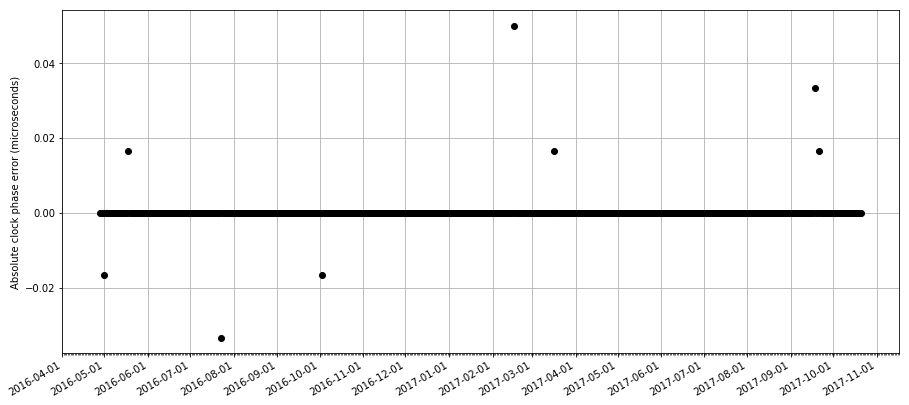

In [431]:
days = DayLocator()   # every year
months = MonthLocator()  # every month
yearsFmt = DateFormatter('%Y-%m-%d')

fig, ax = plt.subplots(figsize=(15,7))

ax.plot(date_lst, LCE,'ok')
ax.set_ylabel('Absolute clock phase error (microseconds)')
y_lim = ax.get_ylim()
ax.set_ylim(y_lim[0],y_lim[1])
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(days)

ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()
fig.savefig(soh_files_folder+sta+'/'+sta+'_LCE.png', dpi=300, facecolor='w')

## LCQ - Clock quality

A heuristic time quality value that can be defined as follows:

. 100% means that the system locked to PS with time error < 5 μs

. 90% signifies an estimated time error of <  100 μs (GPS duty cycling, or coarse locked)

. 70% signifies an estimated time error of < 200 μs (GPS coarse locked or system free running)

. <70% decrements from 70% by 1% for each hour free running

. 0% means that the system has never locked or been free running for more than 70 hours

In [432]:
LCQ = [[]]*len(sta_files)

for i,j in enumerate(sta_files):
    for k,l in enumerate(j):
        for r,t in enumerate(l):
            if t.stats.channel == 'LCQ':
                mean_hora = np.mean(l[r].data)
                LCQ[i] = np.mean(np.array(mean_hora))
np.savetxt(soh_files_folder+sta+'/'+sta+'_LCQ.txt', LCQ)
%time

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 4.29 µs


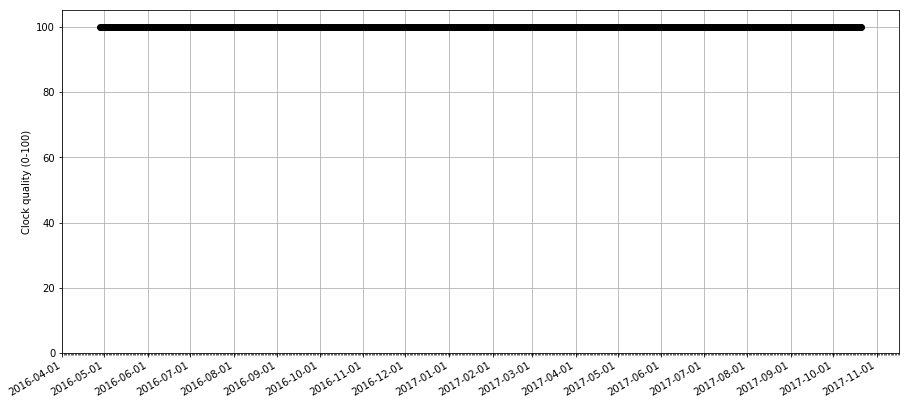

In [433]:
days = DayLocator()   # every year
months = MonthLocator()  # every month
yearsFmt = DateFormatter('%Y-%m-%d')

fig, ax = plt.subplots(figsize=(15,7))

ax.plot_date(date_lst, LCQ,fmt='ok')
ax.set_ylabel('Clock quality (0-100)')
ax.set_ylim(0,105)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(days)

ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()
fig.savefig(soh_files_folder+sta+'/'+sta+'_LCQ.png', dpi=300, facecolor='w')

## GLA  - GPS latitude 
(microdegrees)

In [434]:
GLA = [[]]*len(sta_files)

for i,j in enumerate(sta_files):
    for k,l in enumerate(j):
        for r,t in enumerate(l):
            if t.stats.channel == 'GLA':
                mean_hora = np.mean(l[r].data*10**-6)
                GLA[i] = np.mean(np.array(mean_hora))
np.savetxt(soh_files_folder+sta+'/'+sta+'_GLA.txt', GLA)
%time

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 4.29 µs


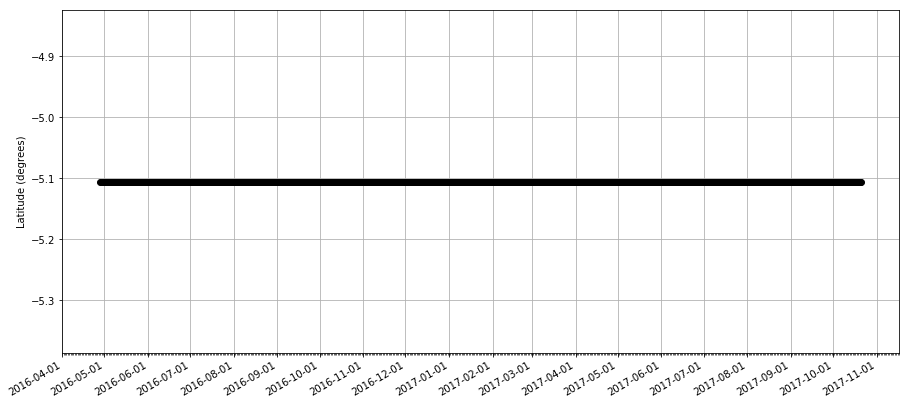

In [435]:
days    = DayLocator()   # every year
months   = MonthLocator()  # every month
yearsFmt = DateFormatter('%Y-%m-%d')

fig, ax = plt.subplots(figsize=(15,7))


ax.plot_date(date_lst, GLA,fmt='ok')
ax.set_ylabel('Latitude (degrees)')
y_lim = ax.get_ylim()
ax.set_ylim(y_lim[0],y_lim[1])
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(days)

ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()
fig.savefig(soh_files_folder+sta+'/'+sta+'_GLA.png', dpi=300, facecolor='w')

## GLO  - GPS longitude
(microdegrees)

In [436]:
GLO = [[]]*len(sta_files)

for i,j in enumerate(sta_files):
    for k,l in enumerate(j):
        for r,t in enumerate(l):
            if t.stats.channel == 'GLO':
                mean_hora = np.mean(l[r].data*10**-6)
                GLO[i] = np.mean(np.array(mean_hora))
np.savetxt(soh_files_folder+sta+'/'+sta+'_GLO.txt', GLO)
%time

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 4.29 µs


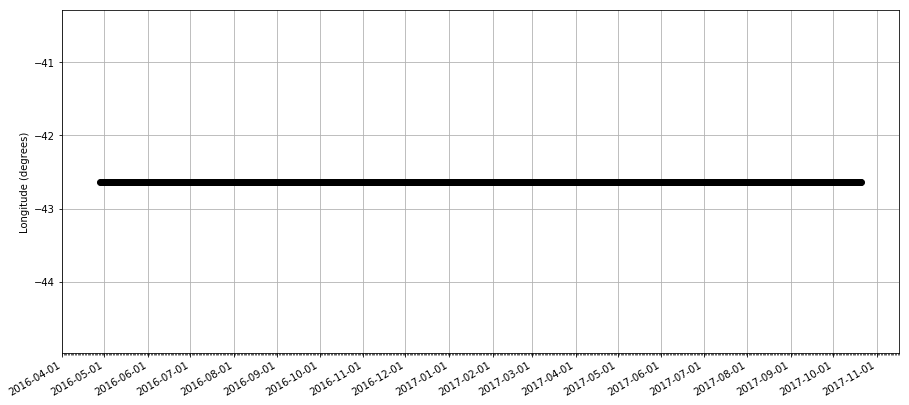

In [437]:
days    = DayLocator()   # every year
months   = MonthLocator()  # every month
yearsFmt = DateFormatter('%Y-%m-%d')

fig, ax = plt.subplots(figsize=(15,7))


ax.plot_date(date_lst, GLO,fmt='ok')
ax.set_ylabel('Longitude (degrees)')
y_lim = ax.get_ylim()
ax.set_ylim(y_lim[0],y_lim[1])
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(days)

ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()
fig.savefig(soh_files_folder+sta+'/'+sta+'_GLO.png', dpi=300, facecolor='w')

## GNS - GPS number of  satellites used

The number of satellites used by the timing solution. If the GPS receiver status is off as indicated by GST, the last known value is
preserved.

In [438]:
GNS = [[]]*len(sta_files)

for i,j in enumerate(sta_files):
    for k,l in enumerate(j):
        for r,t in enumerate(l):
            if t.stats.channel == 'GNS':
                mean_hora = round(np.mean(l[r].data),0)
                GNS[i] = round(np.mean(np.array(mean_hora)),0)
np.savetxt(soh_files_folder+sta+'/'+sta+'_GNS.txt', GNS)
%time

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.01 µs


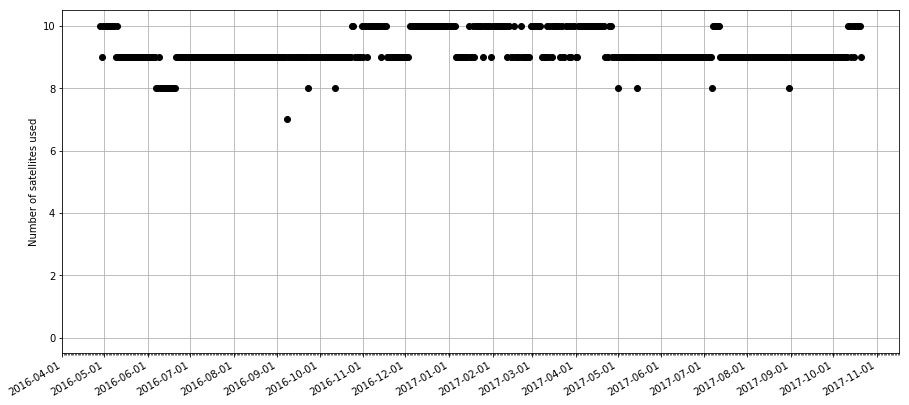

In [439]:
days    = DayLocator()   # every year
months   = MonthLocator()  # every month
yearsFmt = DateFormatter('%Y-%m-%d')

fig, ax = plt.subplots(figsize=(15,7))


ax.plot_date(date_lst, GNS,fmt='ok')
ax.set_ylabel('Number of satellites used')
ax.set_ylim(-0.5,10.5)

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(days)


ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()
fig.savefig(soh_files_folder+sta+'/'+sta+'_GNS.png', dpi=300, facecolor='w')

## GST  - GPS status

 0=off, 1=unlocked, 2=locked

In [440]:
GST = [[]]*len(sta_files)

for i,j in enumerate(sta_files):
    for k,l in enumerate(j):
        for r,t in enumerate(l):
            if t.stats.channel == 'GST':
                mean_hora = round(np.mean(l[r].data),0)
                GST[i] = round(np.mean(np.array(mean_hora)),0)
np.savetxt(soh_files_folder+sta+'/'+sta+'_GST.txt', GST)
%time

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 3.81 µs


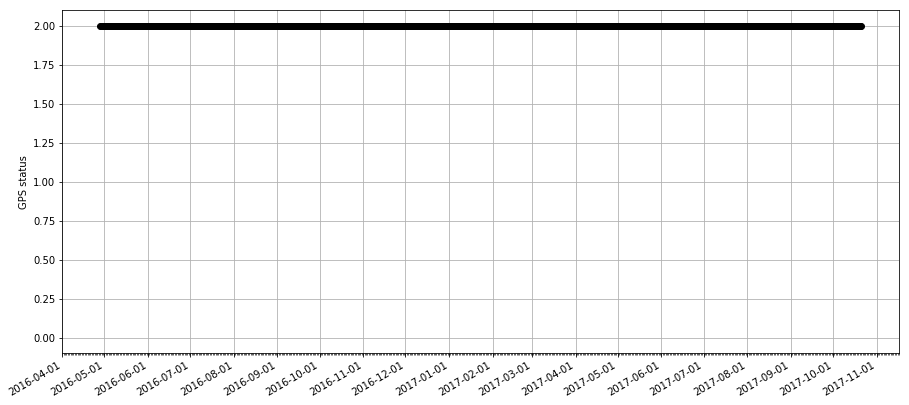

In [441]:
days    = DayLocator()   # every year
months   = MonthLocator()  # every month
yearsFmt = DateFormatter('%Y-%m-%d')

fig, ax = plt.subplots(figsize=(15,7))


ax.plot_date(date_lst, GST,fmt='ok')
ax.set_ylabel('GPS status')
ax.set_ylim(-0.1,2.1)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(days)



ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()
fig.savefig(soh_files_folder+sta+'/'+sta+'_GST.png', dpi=300, facecolor='w')

## GPL  - GPS PLL status

0=no lock, 1=coarse lock, 2=fine lock, 3=free running

In [442]:
GPL = [[]]*len(sta_files)

for i,j in enumerate(sta_files):
    for k,l in enumerate(j):
        for r,t in enumerate(l):
            if t.stats.channel == 'GPL':
                mean_hora = round(np.mean(l[r].data),0)
                GPL[i] = round(np.mean(np.array(mean_hora)),0)
np.savetxt(soh_files_folder+sta+'/'+sta+'_GPL.txt', GPL)
%time

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 3.58 µs


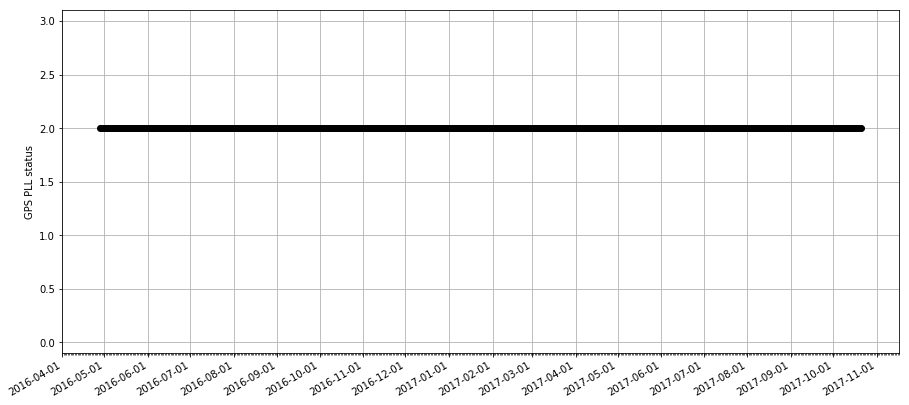

In [443]:
days    = DayLocator()   # every year
months   = MonthLocator()  # every month
yearsFmt = DateFormatter('%Y-%m-%d')

fig, ax = plt.subplots(figsize=(15,7))


ax.plot_date(date_lst, GPL,fmt='ok')
ax.set_ylabel('GPS PLL status')
ax.set_ylim(-0.1,3.1)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(days)



ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()
fig.savefig(soh_files_folder+sta+'/'+sta+'_GPL.png', dpi=300, facecolor='w')

## GAN  - GPS antenna status

0=ok, 1=no antenna, 2=antenna short

In [444]:
GAN = [[]]*len(sta_files)

for i,j in enumerate(sta_files):
    for k,l in enumerate(j):
        for r,t in enumerate(l):
            if t.stats.channel == 'GAN':
                mean_hora = round(np.mean(l[r].data),0)
                GAN[i] = round(np.mean(np.array(mean_hora)),0)
np.savetxt(soh_files_folder+sta+'/'+sta+'_GAN.txt', GAN)
%time

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 3.58 µs


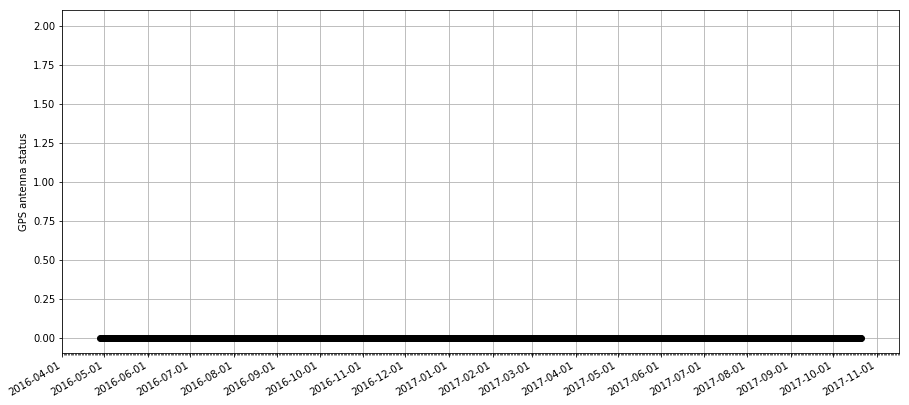

In [445]:
days    = DayLocator()   # every year
months   = MonthLocator()  # every month
yearsFmt = DateFormatter('%Y-%m-%d')

fig, ax = plt.subplots(figsize=(15,7))


ax.plot_date(date_lst, GAN,fmt='ok')
ax.set_ylabel('GPS antenna status')
ax.set_ylim(-0.1,2.1)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(days)



ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()
fig.savefig(soh_files_folder+sta+'/'+sta+'_GAN.png', dpi=300, facecolor='w')

## GEL - GPS elevation 
(micrometres)

In [446]:
GEL = [[]]*len(sta_files)

for i,j in enumerate(sta_files):
    for k,l in enumerate(j):
        for r,t in enumerate(l):
            if t.stats.channel == 'GEL':
                mean_hora = np.mean(l[r].data*10**-6)
                GEL[i] = np.mean(np.array(mean_hora))
np.savetxt(soh_files_folder+sta+'/'+sta+'_GEL.txt', GEL)
%time

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 6.2 µs


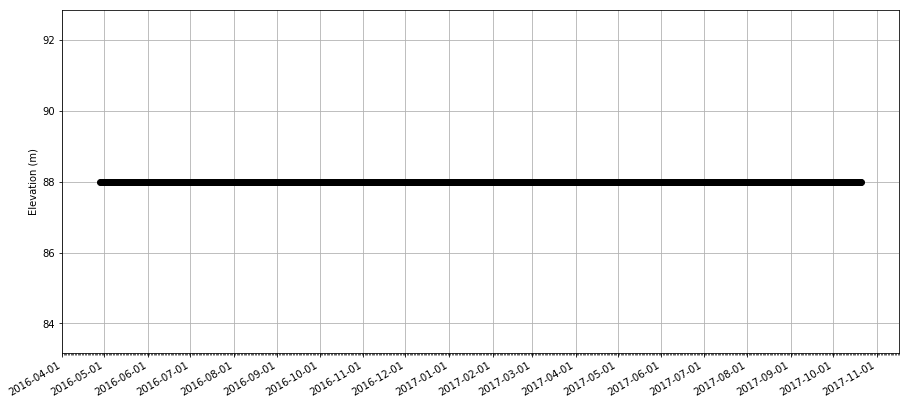

In [447]:
days    = DayLocator()   # every year
months   = MonthLocator()  # every month
yearsFmt = DateFormatter('%Y-%m-%d')

fig, ax = plt.subplots(figsize=(15,7))


ax.plot_date(date_lst, GEL,fmt='ok')
ax.set_ylabel('Elevation (m)')
y_lim = ax.get_ylim()
ax.set_ylim(y_lim[0],y_lim[1])
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(days)



ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()
fig.savefig(soh_files_folder+sta+'/'+sta+'_GEL.png', dpi=300, facecolor='w')

## VEI - Input system voltage 
(millivolts)

In [448]:
VEI = [[]]*len(sta_files)

for i,j in enumerate(sta_files):
    for k,l in enumerate(j):
        for r,t in enumerate(l):
            if t.stats.channel == 'VEI':
                mean_hora = np.mean(l[r].data*10**-3)
                VEI[i] = np.mean(np.array(mean_hora))
np.savetxt(soh_files_folder+sta+'/'+sta+'_VEI.txt', VEI)
%time

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.72 µs


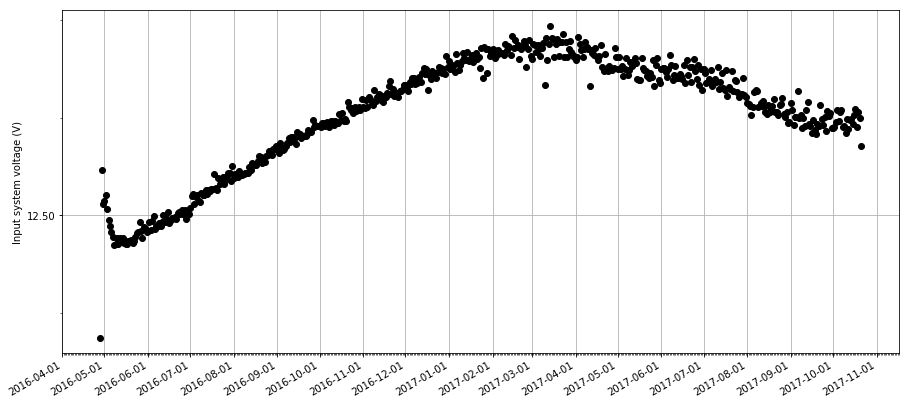

In [449]:
days    = DayLocator()   # every year
months   = MonthLocator()  # every month
yearsFmt = DateFormatter('%Y-%m-%d')

majorLocator = MultipleLocator(0.5)
majorFormatter = FormatStrFormatter('%1.2f')
minorLocator = MultipleLocator(0.1)

fig, ax = plt.subplots(figsize=(15,7))


ax.plot_date(date_lst, VEI,fmt='ok')
ax.set_ylabel('Input system voltage (V)')
y_lim = ax.get_ylim()
ax.set_ylim(y_lim[0],y_lim[1])

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(days)

ax.yaxis.set_minor_locator(minorLocator)
ax.yaxis.set_major_locator(majorLocator)
ax.yaxis.set_major_formatter(majorFormatter)

ax.grid(True)


# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()
fig.savefig(soh_files_folder+sta+'/'+sta+'_VEI.png', dpi=300, facecolor='w')

## VEC - Digitizer system current
(milliamps)

In [450]:
VEC = [[]]*len(sta_files)

for i,j in enumerate(sta_files):
    for k,l in enumerate(j):
        for r,t in enumerate(l):
            if t.stats.channel == 'VEC':
                mean_hora = np.mean(l[r].data)
                VEC[i] = np.mean(np.array(mean_hora))
np.savetxt(soh_files_folder+sta+'/'+sta+'_VEC.txt', VEC)
%time

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 3.34 µs


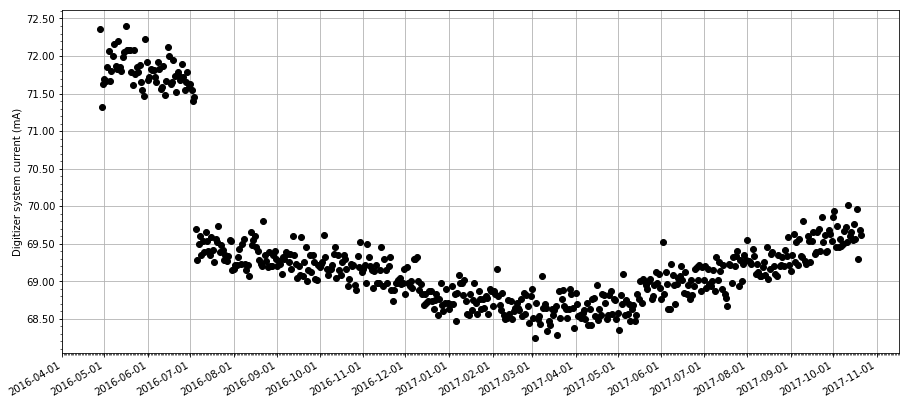

In [451]:
days    = DayLocator()   # every year
months   = MonthLocator()  # every month
yearsFmt = DateFormatter('%Y-%m-%d')

majorLocator = MultipleLocator(0.5)
majorFormatter = FormatStrFormatter('%1.2f')
minorLocator = MultipleLocator(0.1)

fig, ax = plt.subplots(figsize=(15,7))


ax.plot_date(date_lst, VEC,fmt='ok')
ax.set_ylabel('Digitizer system current (mA)')
y_lim = ax.get_ylim()
ax.set_ylim(y_lim[0],y_lim[1])

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(days)

ax.yaxis.set_minor_locator(minorLocator)
ax.yaxis.set_major_locator(majorLocator)
ax.yaxis.set_major_formatter(majorFormatter)

ax.grid(True)


# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()
fig.savefig(soh_files_folder+sta+'/'+sta+'_VEC.png', dpi=300, facecolor='w')

## VDT - Digitizer system temperature
(millidegrees Celsius)

In [452]:
VDT = [[]]*len(sta_files)

for i,j in enumerate(sta_files):
    for k,l in enumerate(j):
        for r,t in enumerate(l):
            if t.stats.channel == 'VDT':
                mean_hora = np.mean(l[r].data*10**-3)
                VDT[i] = np.mean(np.array(mean_hora))
np.savetxt(soh_files_folder+sta+'/'+sta+'_VDT.txt', VDT)
%time

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 4.29 µs


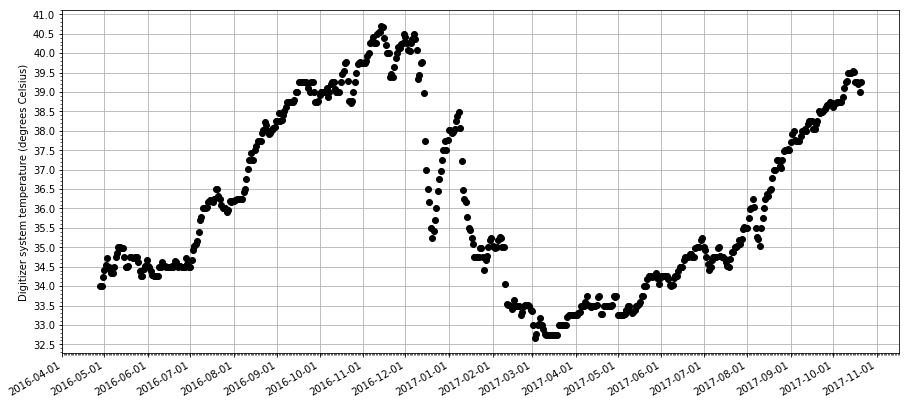

In [453]:
days    = DayLocator()   # every year
months   = MonthLocator()  # every month
yearsFmt = DateFormatter('%Y-%m-%d')

majorLocator = MultipleLocator(0.5)
majorFormatter = FormatStrFormatter('%1.1f')
minorLocator = MultipleLocator(0.1)

fig, ax = plt.subplots(figsize=(15,7))


ax.plot(date_lst, VDT,'ok',lw=3)
ax.set_ylabel('Digitizer system temperature (degrees Celsius)')
y_lim = ax.get_ylim()
ax.set_ylim(y_lim[0],y_lim[1])

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(days)

ax.yaxis.set_minor_locator(minorLocator)
ax.yaxis.set_major_locator(majorLocator)
ax.yaxis.set_major_formatter(majorFormatter)

ax.grid(True)


# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()
fig.savefig(soh_files_folder+sta+'/'+sta+'_VDT.png', dpi=300, facecolor='w')

## Sensor SOH channel 1 to 3
(microvolts)

This value represents mass position.
<p> .VM1 = W axis<p>
<p> .VM2 = V axis<p>
<p> .VM3 = U axis<p>
 
<p>All three mass position values of a connected sensor are between -2.5 V and +2.5 V. Seismometer mass positions adjust very slowly. So if the sensor has been shifted from level, it will take many minutes for the Meridian Compact PH to recognize that this has occurred. In the meantime, the LED will remain green.<p>


<p>There is an error condition that could prevent the sensor from operating properly. Possible problems could include the following:<p>

<p>. At least one mass position value is below -2.5 V or above +2.5 V.<p>
<p>. If the Sensor settings from the Configuration menu differ from the Axis and Period settings on the Sensor page, or the Period setting on the Summary page.<p>


<p>A Meridian Compact PH may be installed in an uncased or cased hole, to a maximum depth of 40
m.<p> 

<p>Mass position bar graphs indicate the current value for each mass position and whether that value
is within the acceptable ranges. Ranges are defined as follows:<p>

<p>.If the voltage falls within the green range of -2.5 V and +2.5 V, it is considered acceptable.
No adjustments are required.<p>

<p>.If the voltage falls within the red ranges of -2.5 V to -4.0 V or +2.5 V to +4.0 V, re-level the
seismometer and check the mass positions while the seismometer is in Short Period mode.
See Monitor Sensor Operation for more information.<p>

## VM1 - Sensor SOH channel 1
(microvolts)

In [454]:
VM1 = [[]]*len(sta_files)

for i,j in enumerate(sta_files):
    for k,l in enumerate(j):
        for r,t in enumerate(l):
            if t.stats.channel == 'VM1':
                mean_hora = np.mean(l[r].data*10**-6)
                VM1[i] = np.mean(np.array(mean_hora))
np.savetxt(soh_files_folder+sta+'/'+sta+'_VM1.txt', VM1)
%time

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.96 µs


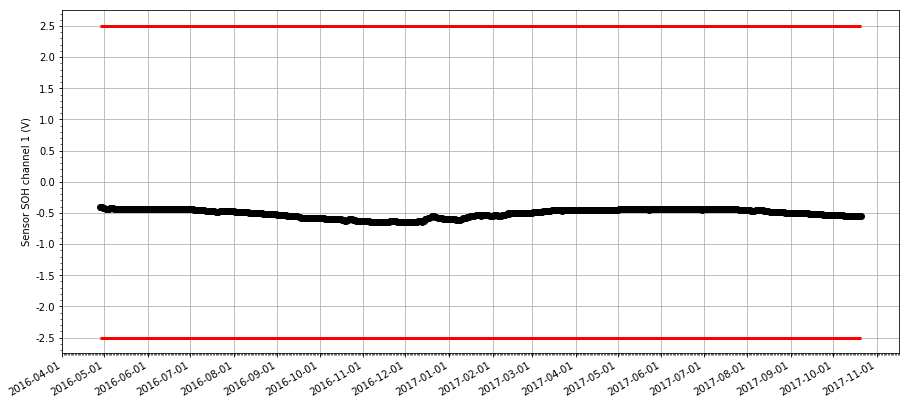

In [455]:
days    = DayLocator()   # every year
months   = MonthLocator()  # every month
yearsFmt = DateFormatter('%Y-%m-%d')

majorLocator = MultipleLocator(0.5)
majorFormatter = FormatStrFormatter('%1.1f')
minorLocator = MultipleLocator(0.1)

fig, ax = plt.subplots(figsize=(15,7))


ax.plot(date_lst, VM1,'ok',lw=3)
ax.set_ylabel('Sensor SOH channel 1 (V)')
ax.hlines(2.5,date_lst[0],date_lst[-1],'r',lw=3)
ax.hlines(-2.5,date_lst[0],date_lst[-1],'r',lw=3)
y_lim = ax.get_ylim()
ax.set_ylim(y_lim[0],y_lim[1])
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(days)

ax.yaxis.set_minor_locator(minorLocator)
ax.yaxis.set_major_locator(majorLocator)
ax.yaxis.set_major_formatter(majorFormatter)

ax.grid(True)


# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()
fig.savefig(soh_files_folder+sta+'/'+sta+'_VM1.png', dpi=300, facecolor='w')

## VM2 - Sensor SOH channel 2
(microvolts)

In [456]:
VM2 = [[]]*len(sta_files)

for i,j in enumerate(sta_files):
    for k,l in enumerate(j):
        for r,t in enumerate(l):
            if t.stats.channel == 'VM2':
                mean_hora = np.mean(l[r].data*10**-6)
                VM2[i] = np.mean(np.array(mean_hora))
np.savetxt(soh_files_folder+sta+'/'+sta+'_VM2.txt', VM2)
%time

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.01 µs


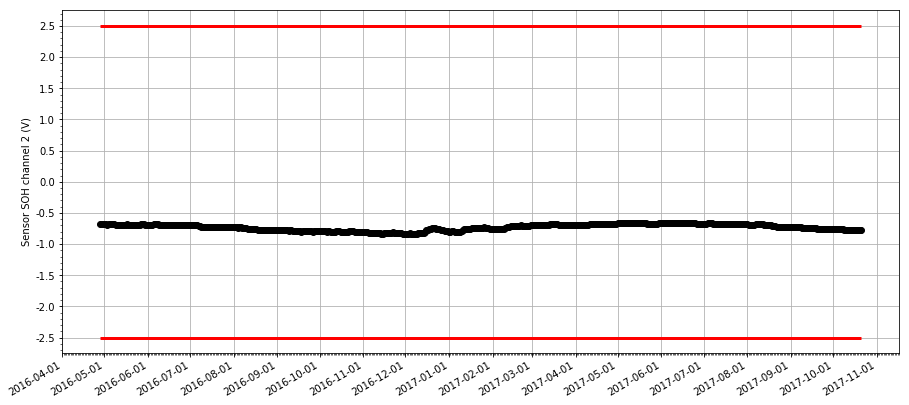

In [457]:
days    = DayLocator()   # every year
months   = MonthLocator()  # every month
yearsFmt = DateFormatter('%Y-%m-%d')

majorLocator = MultipleLocator(0.5)
majorFormatter = FormatStrFormatter('%1.1f')
minorLocator = MultipleLocator(0.1)

fig, ax = plt.subplots(figsize=(15,7))


ax.plot(date_lst, VM2,'ok',lw=3)
ax.set_ylabel('Sensor SOH channel 2 (V)')
ax.hlines(2.5,date_lst[0],date_lst[-1],'r',lw=3)
ax.hlines(-2.5,date_lst[0],date_lst[-1],'r',lw=3)
y_lim = ax.get_ylim()
ax.set_ylim(y_lim[0],y_lim[1])
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(days)

ax.yaxis.set_minor_locator(minorLocator)
ax.yaxis.set_major_locator(majorLocator)
ax.yaxis.set_major_formatter(majorFormatter)

ax.grid(True)


# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()
fig.savefig(soh_files_folder+sta+'/'+sta+'_VM2.png', dpi=300, facecolor='w')

## VM3 - Sensor SOH channel 3
(microvolts)

In [458]:
VM3 = [[]]*len(sta_files)

for i,j in enumerate(sta_files):
    for k,l in enumerate(j):
        for r,t in enumerate(l):
            if t.stats.channel == 'VM3':
                mean_hora = np.mean(l[r].data*10**-6)
                VM3[i] = np.mean(np.array(mean_hora))
np.savetxt(soh_files_folder+sta+'/'+sta+'_VM3.txt', VM3)
%time

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 4.05 µs


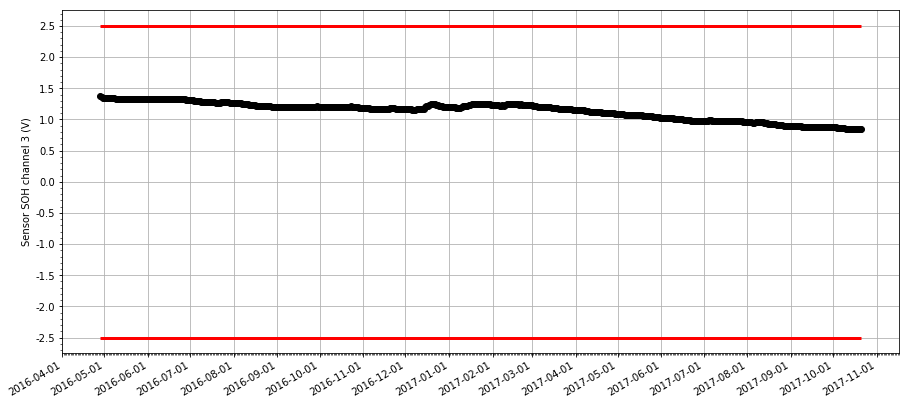

In [459]:
days    = DayLocator()   # every year
months   = MonthLocator()  # every month
yearsFmt = DateFormatter('%Y-%m-%d')

majorLocator = MultipleLocator(0.5)
majorFormatter = FormatStrFormatter('%1.1f')
minorLocator = MultipleLocator(0.1)

fig, ax = plt.subplots(figsize=(15,7))


ax.plot(date_lst, VM3,'ok',lw=3)
ax.set_ylabel('Sensor SOH channel 3 (V)')
ax.hlines(2.5,date_lst[0],date_lst[-1],'r',lw=3)
ax.hlines(-2.5,date_lst[0],date_lst[-1],'r',lw=3)
y_lim = ax.get_ylim()
ax.set_ylim(y_lim[0],y_lim[1])
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(days)

ax.yaxis.set_minor_locator(minorLocator)
ax.yaxis.set_major_locator(majorLocator)
ax.yaxis.set_major_formatter(majorFormatter)

ax.grid(True)


# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()
fig.savefig(soh_files_folder+sta+'/'+sta+'_VM3.png', dpi=300, facecolor='w')

## Dados para a criação do arquivo XML:

In [460]:
sta

'TRZN'

In [461]:
lat = "{0:.4f}".format(np.mean(GLA))

In [462]:
lat

'-5.1057'

In [463]:
long = "{0:.4f}".format(np.mean(GLO))

In [464]:
long

'-42.6339'

In [465]:
elev = "{0:.1f}".format(np.mean(GEL))

In [466]:
elev

'88.0'

In [467]:
date_initial = min(date_lst)

In [468]:
date_initial

datetime.date(2016, 4, 28)

In [469]:
sta_xml = ','.join([sta,lat,long,elev,str(date_initial.year),str(date_initial.month),str(date_initial.day)])

In [470]:
with open('/home/diogo/dados_doutorado/parnaiba_basin/assessing_data/xml_file/'+sta+'_xml_info.txt', "w") as text_file:
    text_file.write(sta_xml)